In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


import warnings
warnings.simplefilter("ignore")

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
   
    return df

In [3]:
df = wrangle(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_training.csv')
print(df.shape)
df.head()

(22850, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [4]:
features =[]
for i in df.columns:
    if df[i].dtypes=="object":
        features.append(i)
    

In [5]:
y = df["loan_status"]
X=df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]


In [6]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
from sklearn import preprocessing
ler =preprocessing.LabelEncoder()

In [8]:
for i in X.columns:
    if X[i].dtypes =="object":
        X[i] = ler.fit_transform(X[i])
        
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,23,65500,3,4.0,2,35000,15.23,1,0.53,0,2
3,21,9900,2,2.0,0,2500,7.14,1,0.25,0,2
4,26,77100,3,8.0,1,35000,12.42,1,0.45,0,3
...,...,...,...,...,...,...,...,...,...,...,...
22845,52,65004,3,4.0,3,20000,15.58,1,0.31,1,19
22846,57,53000,0,1.0,2,5800,13.16,0,0.11,0,30
22847,54,120000,0,4.0,0,17625,7.49,0,0.15,0,19
22848,56,150000,0,5.0,1,15000,11.48,0,0.10,0,26


In [9]:
for i in X.columns:
    print(X[i].isna().sum())

0
0
0
613
0
0
2147
0
0
0
0


In [10]:
for i in X.columns:
    if X[i].isna().sum()> 0:
        print(i,'Column','contain',X[i],'null values')
        X[i].fillna(value =X[i].mean(),inplace=True)

person_emp_length Column contain 0        123.0
1          5.0
2          4.0
3          2.0
4          8.0
         ...  
22845      4.0
22846      1.0
22847      4.0
22848      5.0
22849      2.0
Name: person_emp_length, Length: 22850, dtype: float64 null values
loan_int_rate Column contain 0        16.02
1        11.14
2        15.23
3         7.14
4        12.42
         ...  
22845    15.58
22846    13.16
22847     7.49
22848    11.48
22849     9.99
Name: loan_int_rate, Length: 22850, dtype: float64 null values


In [11]:
for i in X.columns:
    print(X[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [13]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [14]:
preds = clf.predict(X_test)

In [15]:
len(preds)

6855

In [16]:
p=pd.DataFrame(preds,columns=["Preds"])
p

,Preds
0,0
1,0
2,0
3,0
4,0
...,...
6850,0
6851,0
6852,0
6853,0


In [17]:
p["Preds"].unique()

array([0, 1], dtype=int64)

In [18]:
p["Preds"].value_counts()

Preds
0    6535
1     320
Name: count, dtype: int64

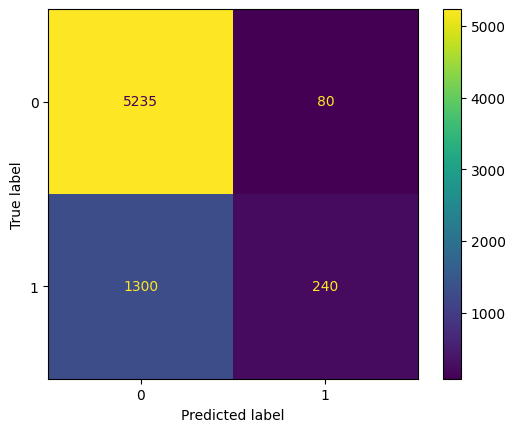

In [19]:
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test);

In [20]:
acc_train =clf .score(X_train,y_train)
acc_test = clf.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8048
Test Accuracy: 0.7987
Training Accuracy: 0.8048
Validation Accuracy: 0.7987


In [21]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5315
           1       0.75      0.16      0.26      1540

    accuracy                           0.80      6855
   macro avg       0.78      0.57      0.57      6855
weighted avg       0.79      0.80      0.74      6855

